In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [90]:
data = pd.read_csv('MagicTelescope.csv')

In [91]:
data.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [92]:
en = preprocessing.LabelEncoder()
en.fit(['h','g'])
data.loc[:,'class'] = en.transform(data['class'])

In [93]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [94]:
tdata = data
scaler = preprocessing.RobustScaler()
tdata[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','FM3Trans','fAlpha','fDist']] = scaler.fit_transform(data[['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','FM3Trans','fAlpha','fDist']])

In [95]:
dlist = list(tdata)
train = dlist[1:10]
predict = dlist[-1]
X = tdata[train]
Y = tdata[[predict]]

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [97]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=10)
DT.fit(x_train,y_train)
DT_predicted = DT.predict(x_test)
DTC = DT.score(x_test,y_test)

In [98]:
print('Classification Report of Decision Tree Induction:\n')
print("\nAccuracy of DT: ",DTC*100,"%\n")
print(classification_report(y_test, DT_predicted))

Classification Report of Decision Tree Induction:


Accuracy of DT:  84.4199088678584 %

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3714
           1       0.83      0.69      0.76      1992

    accuracy                           0.84      5706
   macro avg       0.84      0.81      0.82      5706
weighted avg       0.84      0.84      0.84      5706



In [99]:
dt_cf = confusion_matrix(y_test,DT_predicted)

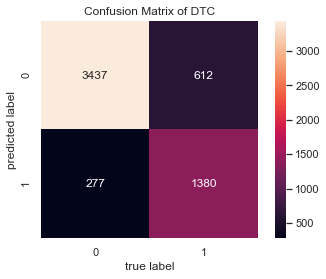

In [100]:
sns.heatmap(dt_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

In [101]:
dt_fpr, dt_tpr, dt_threshold = metrics.roc_curve(y_test, DT_predicted)
dt_roc = metrics.auc(dt_fpr, dt_tpr)

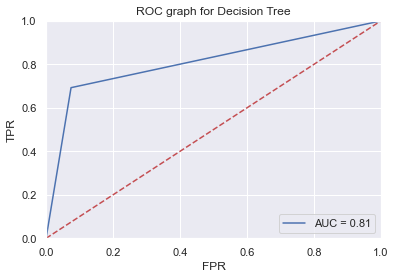

In [102]:
plt.title('ROC graph for Decision Tree')
plt.plot(dt_fpr, dt_tpr, label='AUC = %0.2f' %dt_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [103]:
DT_TP = dt_cf[0][0]
DT_FP = dt_cf[0][1]
DT_FN = dt_cf[1][0]
DT_TN = dt_cf[1][1]
DT_FP = DT_FP.astype(float)
DT_TP = DT_TP.astype(float)
DT_FN = DT_FN.astype(float)
DT_TN = DT_TN.astype(float)

In [104]:
#Sensitivity, recall, TPR
DT_TPR = DT_TP / (DT_TP + DT_FN)
#FPR
DT_FPR = DT_FP / (DT_FP + DT_TN)

In [105]:
print("TPR of Decision Tree: " ,DT_TPR)
print("FPR of Decision Tree: " ,DT_FPR)

TPR of Decision Tree:  0.8488515682884663
FPR of Decision Tree:  0.16716958358479178


In [106]:
from sklearn.svm import LinearSVC
SV = LinearSVC(max_iter = 10000)
SV.fit(x_train,y_train.values.ravel())
SV_predicted = SV.predict(x_test)
SVS = SV.score(x_test,y_test.values.ravel())

In [107]:
print('Classification Report of SVM:\n')
print("\nAccuracy of SVC: ",SVS*100,"%\n")
print(classification_report(y_test, SV_predicted))

Classification Report of SVM:


Accuracy of SVC:  77.65509989484752 %

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3714
           1       0.74      0.56      0.63      1992

    accuracy                           0.78      5706
   macro avg       0.76      0.73      0.74      5706
weighted avg       0.77      0.78      0.77      5706



Text(0.5, 1.0, 'Confusion Matrix of SVM')

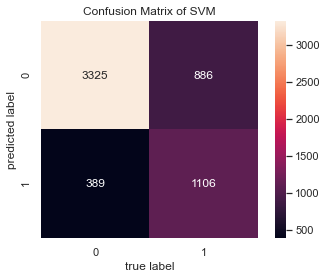

In [108]:
sv_cf = confusion_matrix(y_test,SV_predicted)
sns.heatmap(sv_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of SVM')

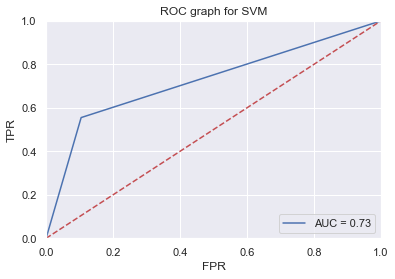

In [109]:
sv_fpr, sv_tpr, sv_threshold = metrics.roc_curve(y_test, SV_predicted)
sv_roc = metrics.auc(sv_fpr, sv_tpr)
plt.title('ROC graph for SVM')
plt.plot(sv_fpr, sv_tpr, label='AUC = %0.2f' %sv_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [110]:
rf_data=data
target = rf_data['class']
inputs = rf_data.drop('class', axis = 'columns')
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.1 )

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8743427970557308

In [111]:
nb_data = data
target = nb_data['class']
inputs = nb_data.drop('class', axis = 'columns')
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.1 )
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7276550998948476

In [112]:
knn_data = data
names = knn_data['class']
inputs = knn_data.drop('class', axis = 'columns')
X_train, X_test, y_train, y_test = train_test_split(inputs, names, test_size = 0.10)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)




0.8422712933753943

In [113]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [114]:
nn_data = data
names = nn_data['class']
inputs = nn_data.drop('class', axis = 'columns')
X_train, X_test, y_train, y_test = train_test_split(inputs, names,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.86198738170347


In [115]:
from sklearn.linear_model import LogisticRegression
lr_data = data
names = lr_data['class']
inputs = lr_data.drop('class', axis = 'columns')
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(inputs, names)
model = LogisticRegression(solver='liblinear', random_state=0).fit(inputs, names)
model.score(inputs, names)

0.791062039957939